In [ ]:
from clustering.py import *
from evaluation.py import *
from feature_extraction.py import *
from preprocessing.py import *
from visualization.py import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Load and preprocess data
wiki_df = pd.read_csv('people_wiki.csv')
print(f"Dataset loaded: {len(wiki_df)} documents")

wiki_df['cleaned_text'] = wiki_df['text'].apply(preprocess_text)

##vicoraization

In [ ]:
#convert text to numeric and give high score to the most important words to make it suitable for ML
vectorizer = TfidfVectorizer(max_features = 20000 , ngram_range=(4,4))
numeric_cleaned_text = vectorizer.fit_transform(dataset_df['cleaned_text'])
normalizer = Normalizer()
X = normalizer.fit_transform(numeric_cleaned_text)

##Kmeans

In [ ]:
elpow =[]
silhouette_scores=[]
for k in range(10,20):
  kmeans = KMeans(n_clusters=k , random_state=42, max_iter= 1000)
  kmeans.fit(numeric_cleaned_text)
  elpow.append(kmeans.inertia_)

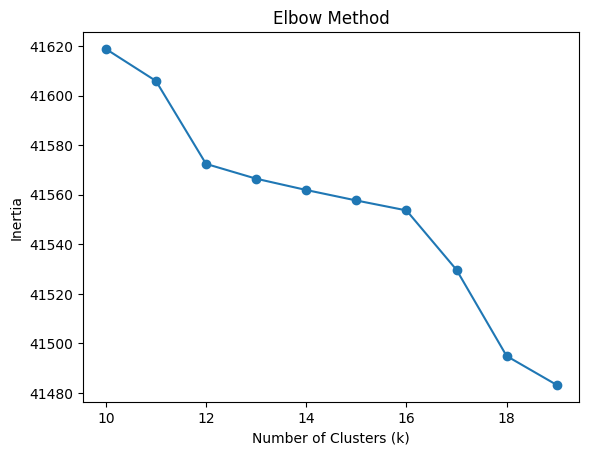

In [ ]:
plt.plot(range(10,20),elpow,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
optimal_k = 18
kmeans = KMeans(n_clusters=optimal_k, random_state=42, max_iter=1000)
clusters = kmeans.fit_predict(X)

In [ ]:
sil_score = silhouette_score(X , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1481


##PCA

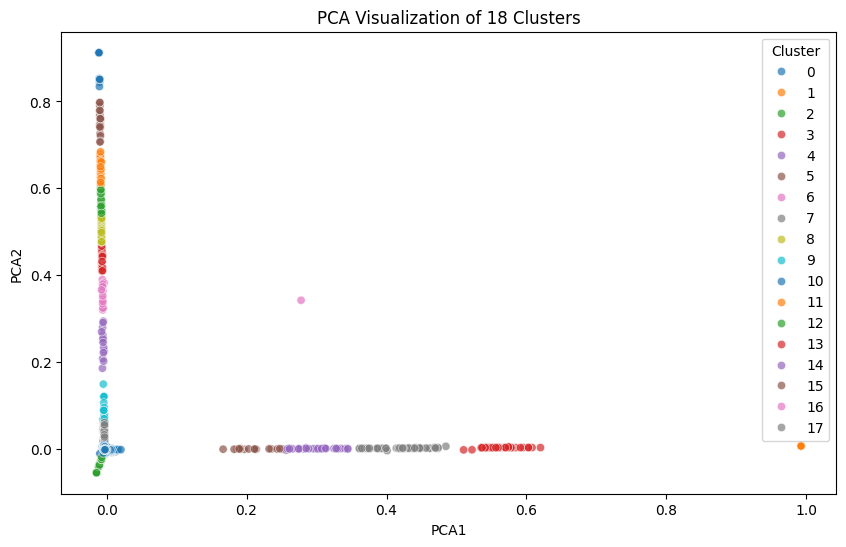

In [ ]:
# Visualizations
visualize_clusters(X, kmeans_labels, 'PCA')

##PCA_silhouette_scores

In [ ]:
sil_score = silhouette_score(X , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1474


### TSNE

In [ ]:
sample_size = 8000
numeric_cleaned_text_df = pd.DataFrame.sparse.from_spmatrix(X)
sample_df = numeric_cleaned_text_df.sample(n=sample_size, random_state=42)

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(sample_df)

print("Data Normalized Successfully!")

Data Normalized Successfully!


In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_data_tsna = tsne.fit_transform(X_normalized.toarray())

In [ ]:
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data_tsna)

####plot TSNE

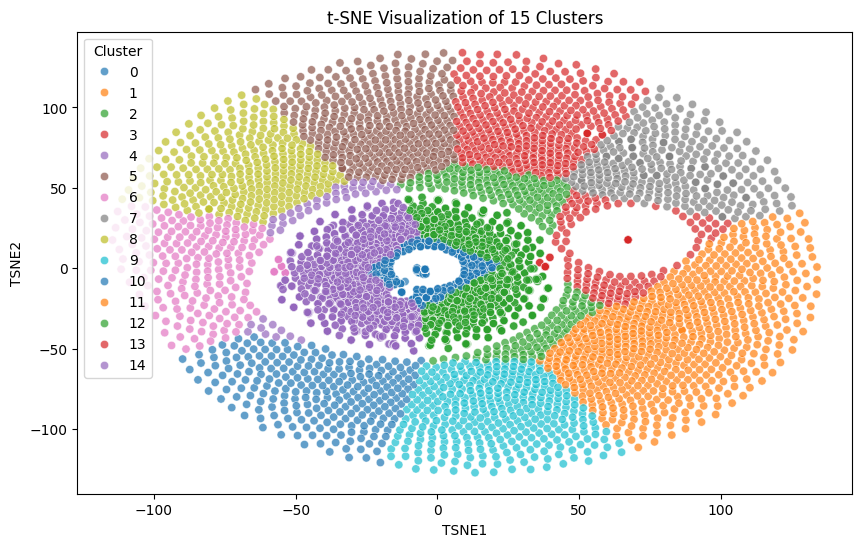

In [ ]:
# Visualizations
visualize_clusters(X_normalized, clusters, 'TSNE')

####TSNE silhouette_scores

In [ ]:
sil_score = silhouette_score(X_normalized , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.0619


###plot dendrogram

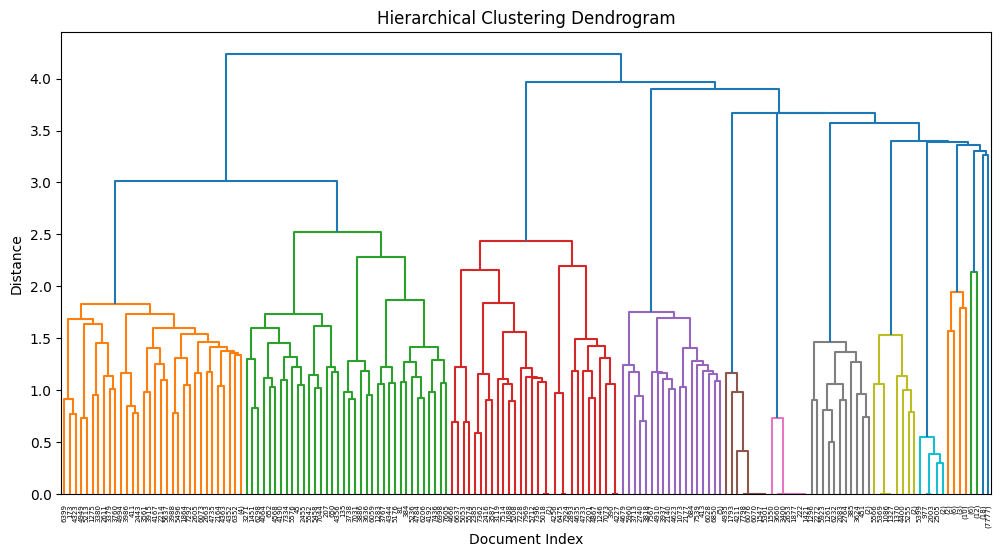

In [ ]:
hierarchical_labels = hierarchical_clustering(X, n_clusters=optimal_k)
print("Hierarchical Evaluation:", hierarchical_results['metrics'])

###TSNE

In [ ]:
optimal_k =15
cluster_hierarchical = AgglomerativeClustering(n_clusters=optimal_k,linkage='ward')
cluster_labels = cluster_hierarchical.fit_predict(reduced_data_tsna)

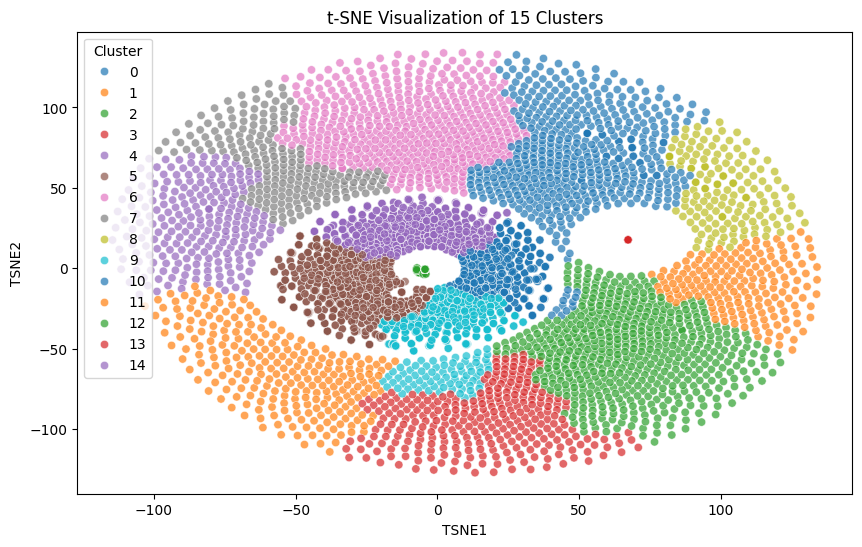

In [ ]:
# Visualizations
visualize_clusters(X, cluster_labels, 'TSNE')

In [ ]:
sil_score = silhouette_score(reduced_data_tsna , cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4755


##word embedding

In [ ]:
# Word2Vec Clustering
w2v_results = word2vec_clustering(
    text_series=news_df['cleaned_text'],
    n_clusters=3,
    true_labels=news_df['category']
)

###KMeans

In [ ]:
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(doc_vectors)

In [ ]:
sil_score = silhouette_score(doc_vectors , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1345


####TSNE

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_data_tsna = tsne.fit_transform(doc_vectors)

In [ ]:
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data_tsna)

#####Silhouette TSNE

In [ ]:
sil_score = silhouette_score(doc_vectors , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.1000


####PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(doc_vectors)

In [ ]:
optimal_k = 15
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(reduced_data_pca)

####silhouette PCA

In [ ]:
sil_score = silhouette_score(doc_vectors , clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.0358


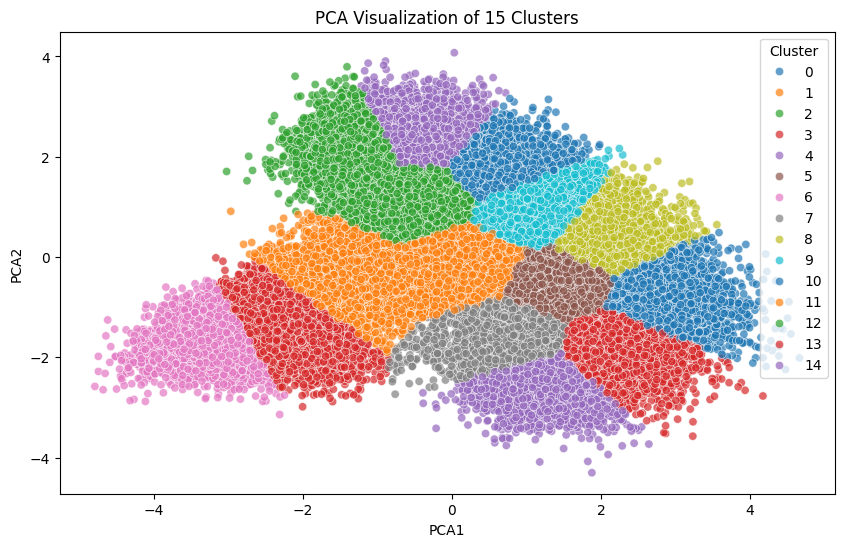

In [ ]:
visualize_clusters(X, cluster_labels, 'PCA')

-----------
# so the best one is using AgglomerativeClustering with TSNE and victoraization with silhouette(0.4)

-------------


---------------------